<a href="https://www.kaggle.com/code/sourabhkumarmandal/logistic-regression-practice?scriptVersionId=184339327" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/logistic-regression-dataset/data.csv


In [2]:
df = pd.read_csv("/kaggle/input/logistic-regression-dataset/data.csv")
df.head()

,SNo,X_1,X_2,y
0,0,-0.869144,0.389310,0.0
1,1,-0.993467,-0.610591,0.0
2,2,-0.834064,0.239236,0.0
3,3,-0.136471,0.632003,1.0
4,4,0.403887,0.310784,1.0


In [3]:
df.drop(columns="SNo", inplace=True)
df.head()

,X_1,X_2,y
0,-0.869144,0.389310,0.0
1,-0.993467,-0.610591,0.0
2,-0.834064,0.239236,0.0
3,-0.136471,0.632003,1.0
4,0.403887,0.310784,1.0


In [4]:
print(df.dtypes)
print(df.columns)
df = df.rename(columns={'X_1':'X1' , 'X_2':'X2' ,'y ': 'y'})
print(df.columns)

X_1    float64
X_2    float64
y      float64
dtype: object
Index(['X_1', 'X_2', 'y '], dtype='object')
Index(['X1', 'X2', 'y'], dtype='object')


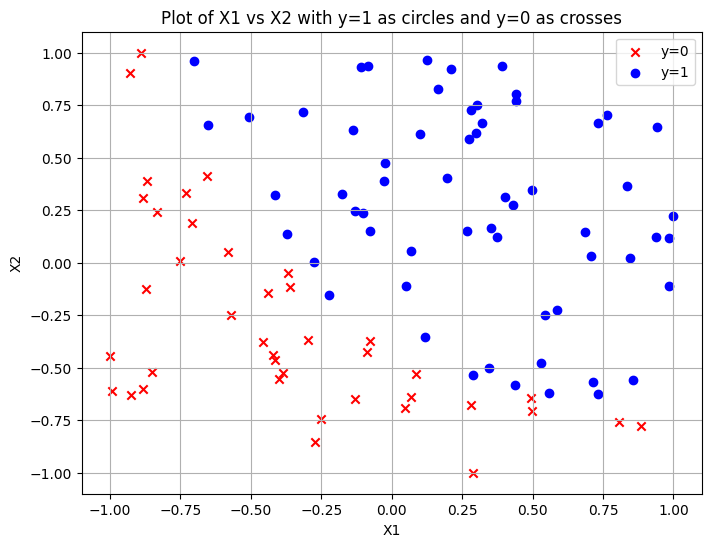

In [5]:
import matplotlib.pyplot as plt
# Separate data points based on y value
df_class0 = df[df['y'] == 0]
df_class1 = df[df['y'] == 1]

# Plotting
plt.figure(figsize=(8, 6))

# Plotting y=0 points as 'x'
plt.scatter(df_class0['X1'], df_class0['X2'], marker='x', color='red', label='y=0')

# Plotting y=1 points as 'o'
plt.scatter(df_class1['X1'], df_class1['X2'], marker='o', color='blue', label='y=1')

# Adding labels and title
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Plot of X1 vs X2 with y=1 as circles and y=0 as crosses')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

In [6]:
x = np.array([df['X1'], df['X2']]).T
y = np.array(df['y'])  

In [7]:
print(x.shape,y.shape)

(100, 2) (100,)


In [8]:
m,n=x.shape
m

100

In [9]:
w=np.zeros(n).reshape(1,-1)
b=0
print(w.shape)

(1, 2)


In [10]:
import math
alpha=0.01
n_iter=1001
for i in range(n_iter):
    dj_db=0
    dj_dw=0
    for j in range(m):
        z = np.dot(w,x[j]) + b
        f_i = 1/(1 + math.exp(-z))
        dj_db += f_i - y[j]
        dj_dw += (f_i - y[j]) * x[j]
    dj_db /= m
    dj_dw /= m
    
    b = b - alpha * dj_db
    w = w - alpha * dj_dw
    
    if (i%1000==0):
        print(f"{i}th iteration")

0th iteration


/tmp/ipykernel_18/3759227605.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f_i = 1/(1 + math.exp(-z))


1000th iteration


In [11]:
print(w,b)
w1=w[0,0]
w2=w[0,1]

[[1.13291177 1.0104573 ]] 0.35395506113615666


In [12]:
# Function to predict probabilities
def predict_probabilities(x, w, b):
    z = np.dot(x, w.T) + b  # Linear combination + bias
    return 1 / (1 + np.exp(-z))  # Applying sigmoid function to get probabilities

# Predict probabilities for each sample
probabilities = predict_probabilities(x, w, b)

# Convert probabilities to binary predictions
y_pred = (probabilities >= 0.5).astype(int)



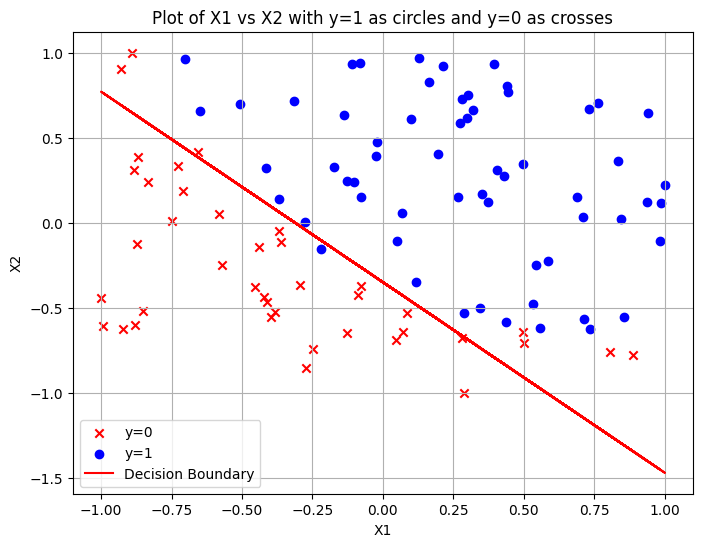

In [13]:
import matplotlib.pyplot as plt

# Separate data points based on y value
df_class0 = df[df['y'] == 0]
df_class1 = df[df['y'] == 1]

# Plotting
plt.figure(figsize=(8, 6))

# Plotting y=0 points as 'x'
plt.scatter(df_class0['X1'], df_class0['X2'], marker='x', color='red', label='y=0')

# Plotting y=1 points as 'o'
plt.scatter(df_class1['X1'], df_class1['X2'], marker='o', color='blue', label='y=1')

# Plot the regression line
slope = w1/w2
intercept = b/w2
plt.plot(df['X1'], -(slope * df['X1'] + intercept), color='red', label='Decision Boundary')

# Adding labels and title
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Plot of X1 vs X2 with y=1 as circles and y=0 as crosses')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


In [14]:
y_test= predict_probabilities([[-0.25,-0.75]],w,b)
y_test= (y_test >= 0.5).astype(int)
y_test

array([[0]])

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
X = df[['X1', 'X2']]  # Features
y = df['y']           # Target variable

In [17]:
model = LogisticRegression()
model.fit(X,y)

LogisticRegression()

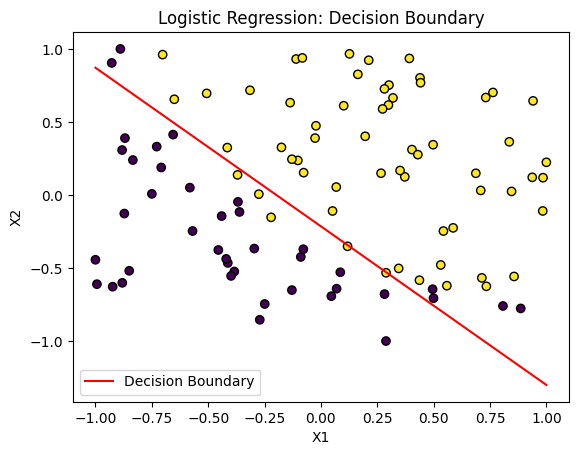

In [18]:
import matplotlib.pyplot as plt

plt.scatter(X['X1'], X['X2'], c=y, cmap='viridis', edgecolors='k')

# Plot decision boundary
coef = model.coef_[0]
intercept = model.intercept_

x1_min, x1_max = X['X1'].min(), X['X1'].max()
x2_min, x2_max = X['X2'].min(), X['X2'].max()

x1_vals = np.linspace(x1_min, x1_max, 100)
x2_vals = -(coef[0] * x1_vals + intercept) / coef[1]

plt.plot(x1_vals, x2_vals, color='red', label='Decision Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Logistic Regression: Decision Boundary')
plt.legend()
plt.show()
